# D207 Assessment - Nathan Gordon

Hypothesis - Customers with lower monthly charges (MonthlyCharge) are less likely to churn (Churn).
Null Hypothesis - There is no evident relationship between the MonthlyCharge and Churn.

### Import Relevant Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Read in cleaned churn data with Pandas read_csv

In [2]:
churn_df = pd.read_csv('churn_clean.csv')

### Preview dataset with Pandas head function

In [3]:
pd.set_option('display.max_columns',50)
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


### Identify variables

In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

### Rename columns: Item 1-8

In [5]:
churn_item_cols = {'Item1': 'Timely_Response',
                         'Item2': 'Timely_Fixes',
                         'Item3': 'Timely_Replacements',
                         'Item4': 'Reliability',
                         'Item5': 'Options',
                         'Item6': 'Respectful_Response',
                         'Item7': 'Courteous_Exchange',
                         'Item8': 'Active_Listening'}

churn_df.rename(columns=churn_item_cols, inplace=True)

### Convert binary fields from categorical (yes/no) to numeric values (1/0)

In [6]:
converted_columns = ['Churn', 
                     'Techie', 
                     'Port_modem', 
                     'Tablet', 
                     'Phone', 
                     'Multiple', 
                     'OnlineSecurity', 
                     'OnlineBackup', 
                     'DeviceProtection', 
                     'TechSupport',
                     'StreamingTV', 
                     'StreamingMovies', 
                     'PaperlessBilling']

for i in converted_columns:
    churn_df[i] = churn_df[i].map({'Yes':1, 'No':0})

### Univariate analysis

#### Explore number of unique fields and their values with categorical data with 5 of less unique values

In [7]:
print('Number of unique Values, types of fields, and value counts\n(Value counts of variables with 5 or less unique values)\n')

for cols in churn_df:
    print(str(cols) + '\n  Unique Values: ' + str(churn_df[cols].nunique()) + '\n  Type: ' + str(churn_df[cols].dtype))
    if churn_df[cols].nunique() <= 5:
        print(churn_df[cols].value_counts(normalize=True))
    print('\n')

Number of unique Values, types of fields, and value counts
(Value counts of variables with 5 or less unique values)

CaseOrder
  Unique Values: 10000
  Type: int64


Customer_id
  Unique Values: 10000
  Type: object


Interaction
  Unique Values: 10000
  Type: object


UID
  Unique Values: 10000
  Type: object


City
  Unique Values: 6058
  Type: object


State
  Unique Values: 52
  Type: object


County
  Unique Values: 1620
  Type: object


Zip
  Unique Values: 8583
  Type: int64


Lat
  Unique Values: 8563
  Type: float64


Lng
  Unique Values: 8630
  Type: float64


Population
  Unique Values: 5933
  Type: int64


Area
  Unique Values: 3
  Type: object
Suburban    0.3346
Rural       0.3327
Urban       0.3327
Name: Area, dtype: float64


TimeZone
  Unique Values: 25
  Type: object


Job
  Unique Values: 639
  Type: object


Children
  Unique Values: 11
  Type: int64


Age
  Unique Values: 72
  Type: int64


Income
  Unique Values: 9993
  Type: float64


Marital
  Unique Values: 5
  

#### Normalize values with z-scores to compare boxplots in same plot. Without normalization, we can't compare the distributions to each other. Income and other variables stretch the y axis values too high which shrinks the other boxplots.

In [8]:
numeric_cols = []

for cols in churn_df:
    if (pd.api.types.is_numeric_dtype(churn_df[cols]) == True) and (len(churn_df[cols].unique()) > 2):
        numeric_cols.append(cols)

churn_numeric = churn_df[numeric_cols]
churn_numeric_normalized = (churn_numeric - churn_numeric.mean())/churn_numeric.std()



#### Plot boxplots of all normalized variables to observe distribution of each variable

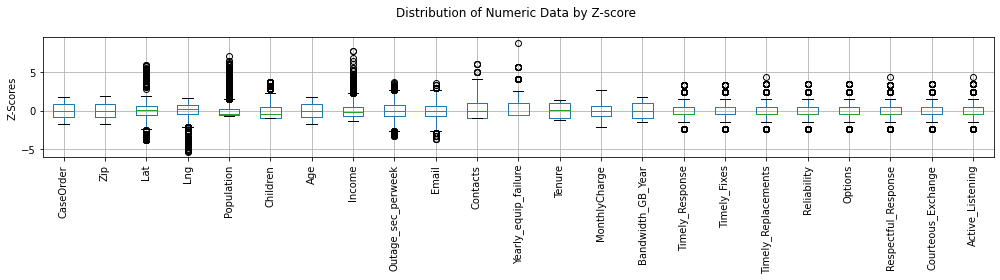

In [9]:
fig, ax = plt.subplots(figsize=[14,4])
churn_numeric_normalized.boxplot()
plt.xticks(rotation=90)
plt.ylabel('Z-Scores')
plt.title('Distribution of Numeric Data by Z-score \n')
plt.tight_layout()
plt.savefig(fname='univariate_continuous3.png', facecolor='w')
plt.show()

## C: Idenifty the distribution of 2 continuous and 2 categorical variables

#### Distribution Plot Monthly Charges (Continuous 1)

C:\Users\Nathan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nathan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


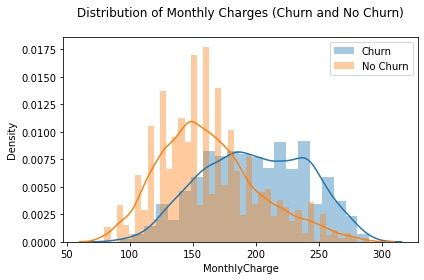

In [10]:
churn_yes = churn_df[churn_df['Churn'] == 1]
churn_no = churn_df[churn_df['Churn'] == 0]

sns.distplot(churn_yes['MonthlyCharge'], label='Churn')
sns.distplot(churn_no['MonthlyCharge'], label='No Churn')
plt.legend()
plt.title('Distribution of Monthly Charges (Churn and No Churn)\n')
plt.tight_layout()
plt.savefig(fname='univariate_continuous1.png', facecolor='w')
plt.show()

#### Histogram of Bandwidth_GB_Year (Continuous 2)

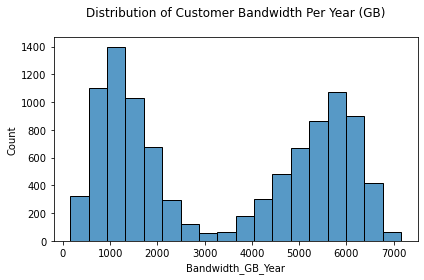

In [11]:
sns.histplot(data=churn_df, x='Bandwidth_GB_Year')
plt.title('Distribution of Customer Bandwidth Per Year (GB)\n ')
plt.tight_layout()
plt.savefig(fname='univariate_continuous2.png', facecolor='w')
plt.show()

#### Barplot of customer churn (Categorical 1)

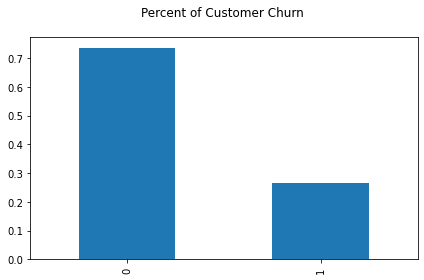

In [12]:
churn_df['Churn'].value_counts(normalize=True).plot.bar()
plt.title('Percent of Customer Churn \n')
plt.tight_layout()
plt.savefig(fname='univariate_categorical1.png', facecolor='w')
plt.show()

#### Pie chart of area (Categorical 2)

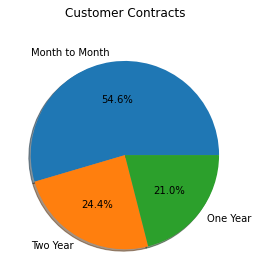

In [13]:
plt.pie(churn_df['Contract'].value_counts(), labels=['Month to Month', 'Two Year', 'One Year'], shadow=True, autopct='%1.1f%%')
plt.title('Customer Contracts\n')
plt.tight_layout()
plt.savefig(fname='univariate_categorical2.png', facecolor='w')
plt.show()

### Bivariate analysis

In [14]:
churn_corr_cols = churn_df[[
                            'Population', 'Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 
                            'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet',
                            'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                            'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure',
                            'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Response', 'Timely_Fixes',
                            'Timely_Replacements', 'Reliability', 'Options', 'Respectful_Response',
                            'Courteous_Exchange', 'Active_Listening'
                            ]]

churn_corr_cols.corr()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Active_Listening
Population,1.000000,-0.005877,0.010538,-0.008639,-0.008533,0.005483,0.017962,0.004019,-0.004483,-0.011483,0.008577,0.001225,0.008196,-0.001241,0.012549,0.010352,-0.003795,-0.006606,-0.006590,-0.005882,0.008656,-0.003559,-0.004778,-0.003902,0.000618,-0.002571,0.001620,-0.008272,0.006970,0.000834,-0.013062,0.008524
Children,-0.005877,1.000000,-0.029732,0.009942,-0.004264,0.001889,0.004479,-0.020776,0.007321,-0.006884,0.011283,0.001494,-0.001629,-0.021969,0.006937,-0.000297,0.005477,0.000878,-0.007106,0.003461,0.006828,-0.005091,-0.009781,0.025585,0.011470,0.013146,0.003394,-0.016768,-0.000240,-0.000547,0.000687,-0.005236
Age,0.010538,-0.029732,1.000000,-0.004091,0.005630,-0.008047,0.001588,0.015068,0.008577,-0.007531,0.006081,-0.004384,0.009521,-0.004674,-0.011213,0.003309,0.014489,0.017155,-0.000197,0.010125,0.002247,0.016979,0.010729,-0.014724,-0.005972,0.006659,-0.003778,0.012237,-0.008305,0.010635,0.005353,0.015193
Income,-0.008639,0.009942,-0.004091,1.000000,0.005937,-0.010011,-0.009267,0.001233,0.005423,0.005442,-0.014977,0.005999,-0.001677,-0.000214,-0.010385,-0.005974,0.014073,0.008835,-0.003324,-0.002186,-0.012049,0.002114,-0.003014,0.003674,-0.004009,0.007718,-0.002707,-0.022750,0.011111,0.001768,0.016599,0.000740
Churn,-0.008533,-0.004264,0.005630,0.005937,1.000000,-0.000156,0.012326,0.008567,-0.015927,0.066722,0.008157,-0.002779,-0.026297,0.131771,-0.013540,0.050508,0.056489,0.018838,0.230151,0.289262,0.007030,-0.485475,0.372938,-0.441669,-0.007341,-0.013253,-0.011143,-0.003396,-0.013971,0.001130,-0.008851,0.005653
Outage_sec_perweek,0.005483,0.001889,-0.008047,-0.010011,-0.000156,1.000000,0.003994,0.015092,0.002909,-0.006264,0.006326,0.005614,-0.010267,0.012142,-0.002416,0.000457,0.022008,-0.013221,0.008952,0.018086,-0.011208,0.002932,0.020496,0.004176,-0.023338,-0.008076,-0.021366,-0.005992,-0.004156,-0.014752,-0.020854,0.008126
Email,0.017962,0.004479,0.001588,-0.009267,0.012326,0.003994,1.000000,0.003040,-0.016354,-0.014047,0.014196,-0.008579,-0.007281,-0.002966,-0.024908,-0.011763,0.001520,0.022119,0.005099,0.000711,-0.012632,-0.014468,0.001997,-0.014579,0.003709,0.001156,0.012928,0.000915,-0.007929,0.014468,0.010010,-0.005857
Contacts,0.004019,-0.020776,0.015068,0.001233,0.008567,0.015092,0.003040,1.000000,-0.006032,0.005343,-0.002219,-0.011855,0.005422,-0.016090,0.010922,0.010398,0.000497,-0.013009,0.000524,0.011002,-0.002649,0.002820,0.004259,0.003299,-0.007364,-0.003003,-0.021924,0.001071,0.004698,-0.000994,0.004579,-0.012615
Yearly_equip_failure,-0.004483,0.007321,0.008577,0.005423,-0.015927,0.002909,-0.016354,-0.006032,1.000000,-0.008516,0.005686,0.003634,-0.007929,0.002213,-0.016486,-0.011500,-0.005903,0.003735,0.002597,-0.004473,0.016603,0.012435,-0.007172,0.012034,0.007518,-0.009773,-0.009372,-0.006906,0.003416,-0.003995,-0.010368,-0.009859
Techie,-0.011483,-0.006884,-0.007531,0.005442,0.066722,-0.006264,-0.014047,0.005343,-0.008516,1.000000,-0.014256,0.010992,-0.003081,-0.004661,-0.015300,0.004540,0.021346,0.007391,0.003436,-0.004298,0.001311,-0.010041,0.007185,-0.009455,0.012103,0.011103,0.009455,-0.003991,0.002460,0.002597,0.005606,-0.003411


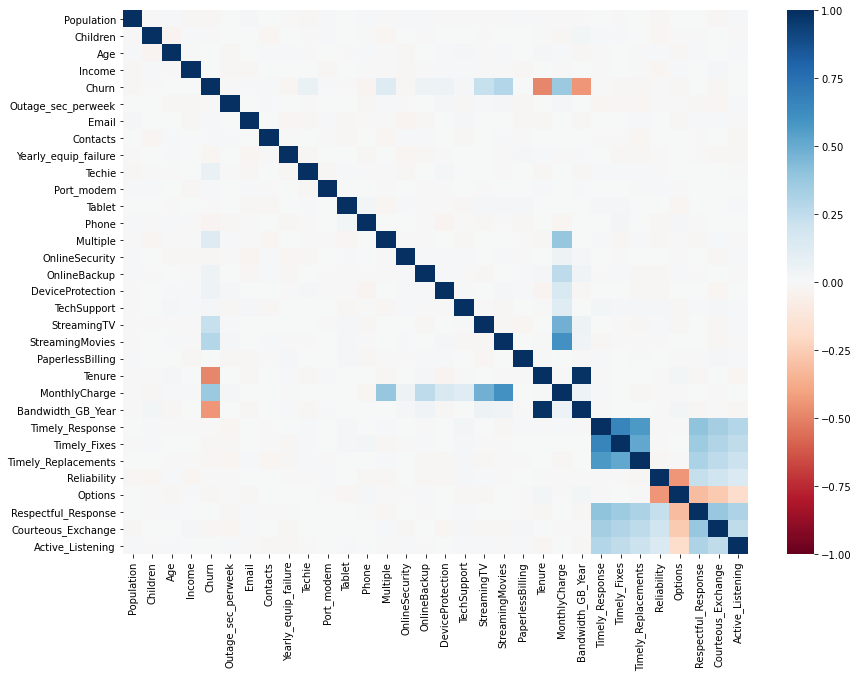

In [15]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(churn_corr_cols.corr(), cmap='RdBu', vmin=-1, vmax=1)
plt.show()

### Create a cleaner version of correlation matrix with relevant fields

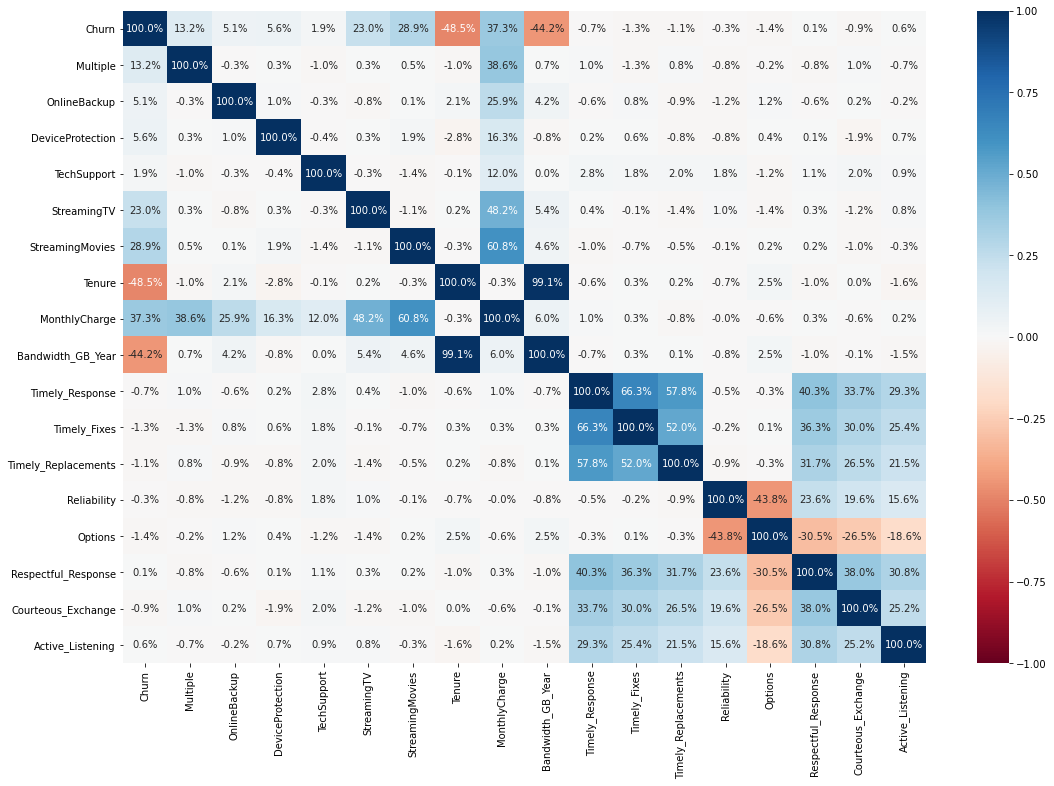

In [16]:
churn_corr_cols_condensed = churn_df[['Churn', 'Multiple', 'OnlineBackup',
                           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                           'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Response', 'Timely_Fixes',
                            'Timely_Replacements', 'Reliability', 'Options', 'Respectful_Response',
                            'Courteous_Exchange', 'Active_Listening']]

fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(churn_corr_cols_condensed.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True, fmt='.1%')
plt.show()

#### Plotting a pairplot with regression lines to observe the relationships between continuous fields

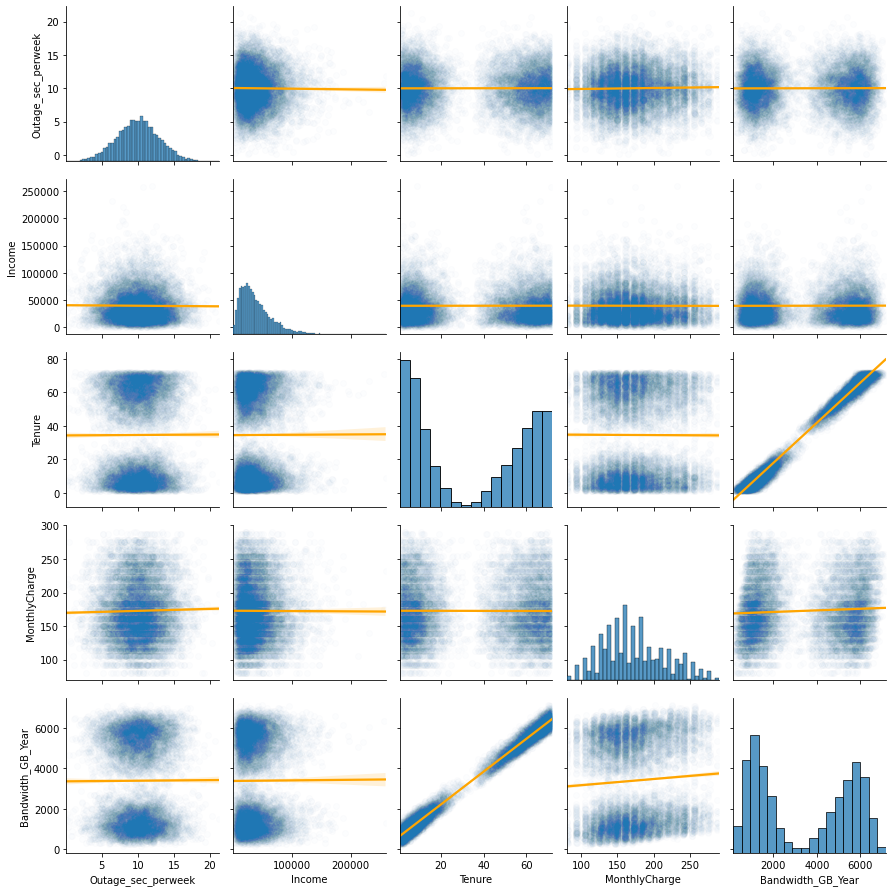

In [17]:
churn_continuous = churn_df[['Outage_sec_perweek', 'Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

sns.pairplot(churn_continuous, kind='reg', plot_kws={'line_kws':{'color':'orange'}, 'scatter_kws': {'alpha': 0.01}})
plt.tight_layout()
plt.savefig(fname='bivariate_continuous1.png', facecolor='w')
plt.show()

#### Using a for loop to iterate through dataframe and calculate r and P for each numeric field and customer churn

Bandwith_GB_Year and Churn have a medium negative correlation with a very low p value.

In [18]:
corr_df = pd.DataFrame(columns=['r', 'p'])

for col in churn_df:
    if pd.api.types.is_numeric_dtype(churn_df[col]):
        r, p = stats.pearsonr(churn_df['Churn'], churn_df[col])
        corr_df.loc[col] = [round(r,3), round(p,3)]
corr_df

,r,p
CaseOrder,-0.409,0.000
Zip,0.008,0.412
Lat,0.009,0.348
Lng,-0.005,0.645
Population,-0.009,0.394
Children,-0.004,0.670
Age,0.006,0.574
Income,0.006,0.553
Churn,1.000,0.000
Outage_sec_perweek,-0.000,0.988


#### Create plot to visualize the distributions of monthly charges for churn and non-churned customers

C:\Users\Nathan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nathan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


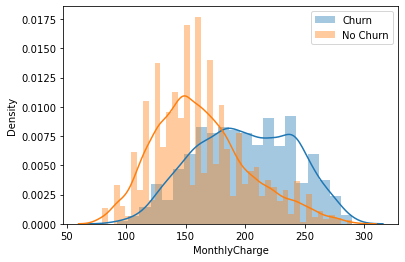

In [19]:
sns.distplot(churn_yes['MonthlyCharge'], label='Churn')
sns.distplot(churn_no['MonthlyCharge'], label='No Churn')
plt.legend()
plt.show()

#### Jointplot of Bandwidth_GB_Year and Tenure (Bivariate Continuous 1)

A jointplot shows that the segmentation of churned customers have much lower Tenure and Bandwidth_GB_Year. Tenure and Bandwidth_GB_Year are highly correlated.

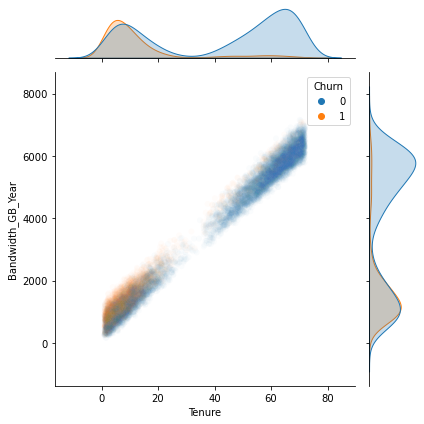

In [20]:
sns.jointplot(data=churn_df, x='Tenure', y='Bandwidth_GB_Year', hue='Churn', alpha=0.02)
plt.tight_layout()
plt.savefig(fname='bivariate_continuous2.png', facecolor='w')
plt.show()

#### Determine r and p values of MonthlyCharge and Bandwidth_GB_Year correlation

In [21]:
r, p = stats.pearsonr(churn_df['MonthlyCharge'], churn_df['Bandwidth_GB_Year'])
print(round(r, 10))
print(round(p, 10))

0.0604064308
1.5e-09


#### Scatterplot of Bandwidth_GB_Year and MonthlyCharge (Bivariate Continuous 2)

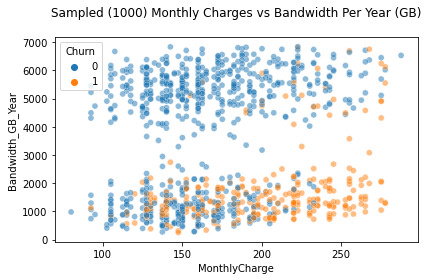

In [22]:
churn_df_condensed = churn_df.sample(1000)

sns.scatterplot(data=churn_df_condensed, x='MonthlyCharge', y='Bandwidth_GB_Year', hue='Churn', alpha=0.5)
plt.title('Sampled (1000) Monthly Charges vs Bandwidth Per Year (GB)\n')
plt.tight_layout()
plt.savefig(fname='bivariate_continuous3.png', facecolor='w')
plt.show()

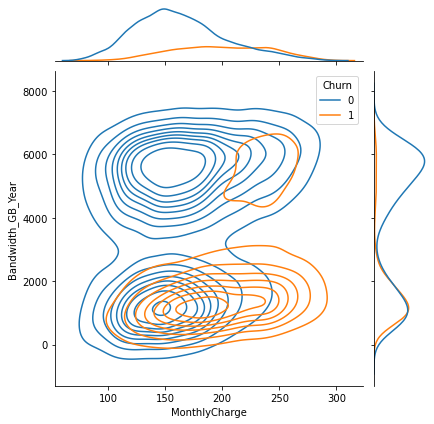

In [23]:
sns.jointplot(data=churn_df, x='MonthlyCharge', y='Bandwidth_GB_Year', hue='Churn', alpha=1, kind='kde')
plt.show()

### Explore Churn correlations with StreamingMovies and StreamingTV with contingency tables

#### Print percentage of customer churn to compare against
26.50% of customers from the dataset are churned

In [24]:
print(churn_df['Churn'].value_counts(normalize=True))

0    0.735
1    0.265
Name: Churn, dtype: float64


#### Create Churn/ StreamingMovies contingency table
39.55% of customers with StreamingMovies are churned compared to 14.01% who don't have StreamMovies service

In [25]:
crosstab_churn_movies = churn_df[['StreamingMovies', 'Churn']]
crosstab_churn_movies = crosstab_churn_movies.pivot_table(index='StreamingMovies', columns='Churn', aggfunc=lambda x: len(x), margins=True)
crosstab_churn_movies = crosstab_churn_movies.loc[0:1,:].copy()
crosstab_churn_movies.loc[:,0:1] = crosstab_churn_movies.loc[:,0:1].div(crosstab_churn_movies['All'],axis=0)
crosstab_churn_movies['All'] = crosstab_churn_movies['All']/sum(crosstab_churn_movies['All'])
print(crosstab_churn_movies)

Churn                   0         1    All
StreamingMovies                           
0                0.859883  0.140117  0.511
1                0.604499  0.395501  0.489


#### Create Churn/ StreamingTV contingency table
36.80% of customers with StreamingTV are churned compared to 16.49% who don't have StreamTV service

In [26]:
crosstab_churn_tv = churn_df[['StreamingTV', 'Churn']]
crosstab_churn_tv = crosstab_churn_tv.pivot_table(index='StreamingTV', columns='Churn', aggfunc=lambda x: len(x), margins=True)
crosstab_churn_tv = crosstab_churn_tv.loc[0:1,:].copy()
crosstab_churn_tv.loc[:,0:1] = crosstab_churn_tv.loc[:,0:1].div(crosstab_churn_tv['All'],axis=0)
crosstab_churn_tv['All'] = crosstab_churn_tv['All']/sum(crosstab_churn_tv['All'])
print(crosstab_churn_tv)

Churn               0         1     All
StreamingTV                            
0            0.835141  0.164859  0.5071
1            0.631974  0.368026  0.4929


### Churn/ StreamingMovies & Churn/ StreamingTV contingency tables verify that they are correlated with customer churn

In [27]:
churn_df.groupby(['Churn', 'StreamingMovies']).size()

Churn  StreamingMovies
0      0                  4394
       1                  2956
1      0                   716
       1                  1934
dtype: int64

### Create barplot to show Churn percentages of StreamingMovies and StreamingTV

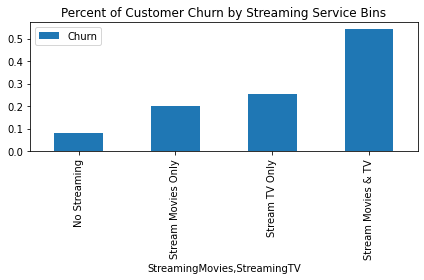

In [28]:
x_pos = [0,1,2,3]
bars=['No Streaming', 'Stream Movies Only', 'Stream TV Only', 'Stream Movies & TV']

groupby_churn_movies = churn_df.pivot_table(index=['StreamingMovies', 'StreamingTV'], values='Churn')
groupby_churn_movies.plot(kind='bar')
plt.xticks(x_pos, bars)
plt.title('Percent of Customer Churn by Streaming Service Bins')
plt.tight_layout()
plt.savefig(fname='bivariate_categorical1.png', facecolor='w')
plt.show()

### Visualize the relationship between survey responses with a correlation matrix

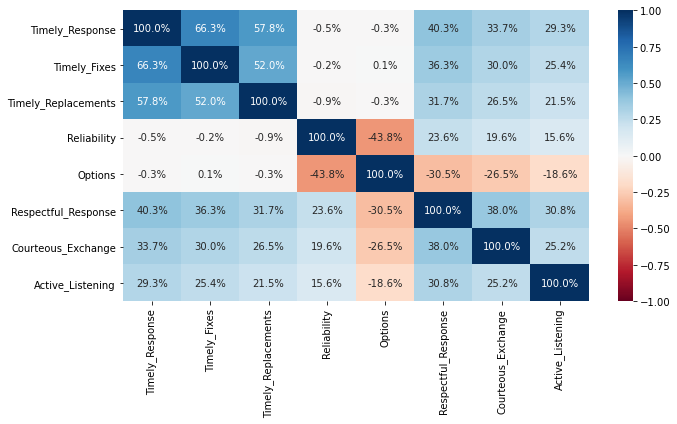

In [29]:
churn_survey = churn_df[[
                        'Timely_Response', 'Timely_Fixes',
                        'Timely_Replacements', 'Reliability', 'Options', 'Respectful_Response',
                        'Courteous_Exchange', 'Active_Listening']]

fig, ax = plt.subplots(figsize=[10,6])
sns.heatmap(churn_survey.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True, fmt='.1%')
plt.tight_layout()
plt.savefig(fname='bivariate_categorical2.png', facecolor='w')
plt.show()

### Further explore the relationship of StreamingMovies and MonthlyCharge with customer churn

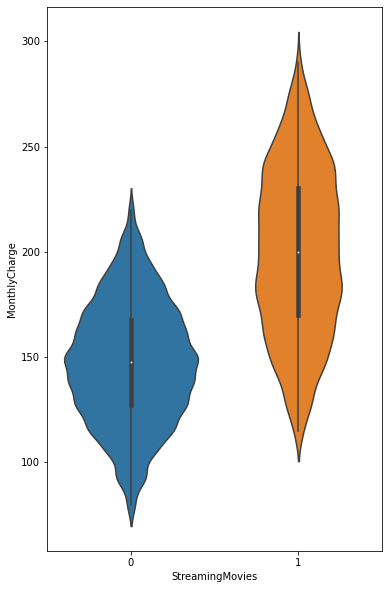

In [30]:
fig, size = plt.subplots(figsize=(6,10))
sns.violinplot(x='StreamingMovies', y='MonthlyCharge', data=churn_df)
plt.show()

### Visual representation of the high churn rate of customers who with movie streaming and are charged a higher montly bill  

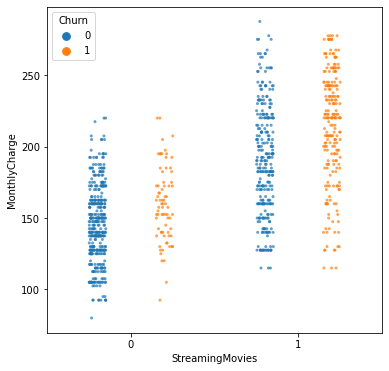

In [31]:
fig, size = plt.subplots(figsize=(6,6)) 
sns.stripplot(x='StreamingMovies', y='MonthlyCharge', hue='Churn', data=churn_df_condensed, alpha=0.7, size=3, dodge=True) 
plt.show()

## B2: T-test

Use t-test to calculate t-value and p-value for MonthlyCharges for churned customers and non-churned customers

T-value of 40.18 and p-value of 0.

In [32]:
churn_yes = churn_df[churn_df['Churn'] == 1]
churn_no = churn_df[churn_df['Churn'] == 0]

t, p = stats.ttest_ind(churn_yes['MonthlyCharge'], churn_no['MonthlyCharge'])
print(f't-value: {t}')
print(f'p-value: {p}')

t-value: 40.189476722374266
p-value: 0.0


## References

https://blog.softhints.com/pandas-count-percentage-value-column/
https://www.programiz.com/python-programming/methods/list/append
https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/
https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/
https://www.python-graph-gallery.com/7-custom-barplot-layout
http://seaborn.pydata.org/generated/seaborn.jointplot.html
https://stackoverflow.com/questions/54506626/how-to-understand-seaborns-heatmap-annotation-format